# Testing Machine Learning Algorithms

## Import the libraries

- **Numpy** $\rightarrow$ mathematic operations
- **Pandas** $\rightarrow$ read the dataset
- **SkLearn** $\rightarrow$ Machine Learning Algorithms
- **Matplotlib** $\rightarrow$ Plot

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Read the Iris DataSet and separate it into a Training and Test Set

In [2]:
iris=pd.read_csv('Iris.csv')
iris=iris.iloc[ : , 1:]
print(iris.shape)
iris.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x=iris.iloc[:,:-1]
y=iris['Species']
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.3,  random_state=42)

print('--------Sizes-------')
print(f'X_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

--------Sizes-------
X_train : (105, 4)
y_train : (105,)
X_test : (45, 4)
y_test : (45,)


## First Model $\rightarrow$ SVC

In [4]:
from sklearn.svm import SVC
SVCmodel=SVC()
SVCmodel.fit(x_train, y_train)
y_pred1=SVCmodel.predict(x_test)

Create a table the predicted values and the relays, as well as to see how many predictions were correct

In [5]:
table1=[]
sum1=0
for i in range(y_pred1.shape[0]):
  flag=0
  if(y_pred1[i]==y_test.iloc[i]):
    flag=1
    sum1+=1
  table1.append([y_pred1[i],y_test.iloc[i],flag])

for i in range(8):
    print(table1[i])

['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-setosa', 'Iris-setosa', 1]
['Iris-virginica', 'Iris-virginica', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-setosa', 'Iris-setosa', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-virginica', 'Iris-virginica', 1]


## Second Model $\rightarrow$ KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
K=3
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)

In [7]:
table2=[]
sum2=0
for i in range(y_pred2.shape[0]):
  flag=0
  if(y_pred2[i]==y_test.iloc[i]):
    flag=1
    sum2+=1
  table2.append([y_pred2[i],y_test.iloc[i],flag])

for i in range(8):
    print(table2[i])

['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-setosa', 'Iris-setosa', 1]
['Iris-virginica', 'Iris-virginica', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-setosa', 'Iris-setosa', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-virginica', 'Iris-virginica', 1]


## Third Model $\rightarrow$ Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()
rf_Model.fit(x_train,y_train)
y_pred3 = rf_Model.predict(x_test)

In [9]:
table3=[]
sum3=0
for i in range(y_pred3.shape[0]):
  flag=0
  if(y_pred3[i]==y_test.iloc[i]):
    flag=1
    sum3+=1
  table3.append([y_pred3[i],y_test.iloc[i],flag])

for i in range(8):
    print(table3[i])

['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-setosa', 'Iris-setosa', 1]
['Iris-virginica', 'Iris-virginica', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-setosa', 'Iris-setosa', 1]
['Iris-versicolor', 'Iris-versicolor', 1]
['Iris-virginica', 'Iris-virginica', 1]


## Fourth Model $\rightarrow$ Linear Regression

As Linear Regression only works with cuantitative values, we have to assign a number to each class; so we are going to print all the classes and map a value to each one

In [10]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris['Species'] = iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Plot the values in a 2D graph, just to have a visualization

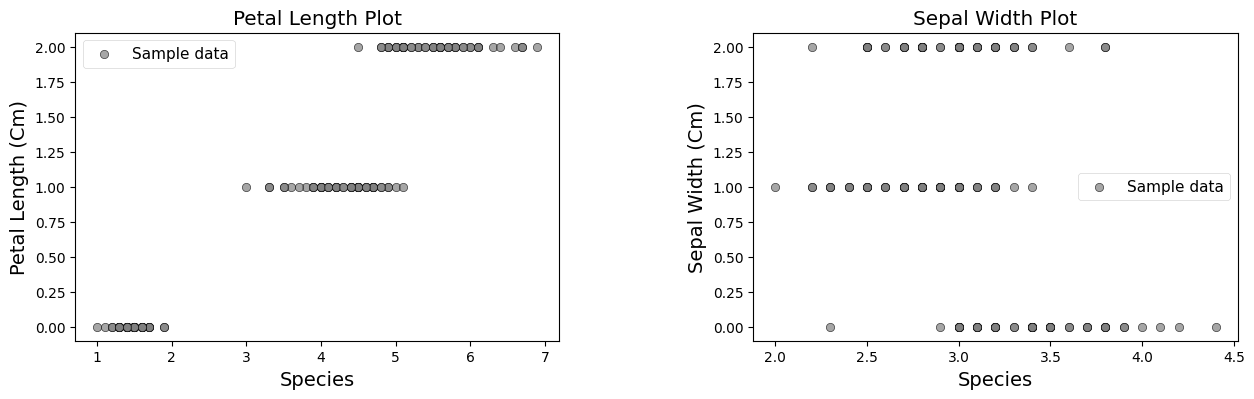

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plt.style.use('default')
plt.style.use('ggplot')

ax1.scatter(iris['PetalLengthCm'], iris['Species'], edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax1.set_ylabel('Petal Length (Cm)', fontsize=14)
ax1.set_xlabel('Species', fontsize=14)
ax1.legend(facecolor='white', fontsize=11)
ax1.set_title("Petal Length Plot")

ax2.scatter(iris['SepalWidthCm'], iris['Species'], edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax2.set_ylabel('Sepal Width (Cm)', fontsize=14)
ax2.set_xlabel('Species', fontsize=14)
ax2.legend(facecolor='white', fontsize=11)
ax2.set_title("Sepal Width Plot")
plt.subplots_adjust(wspace=0.4)

In [13]:
x2=iris.iloc[:,:-1]
y2=iris.iloc[:,4]
x_train2,x_test2, y_train2, y_test2=train_test_split(x2,y2,test_size=0.30)

In [14]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x_train2, y_train2)
y_pred4 = LR_model.predict(x_test2)
y_pred4 = y_pred4.round().astype(int)
y_pred4

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,
       2])

In [15]:
table4=[]
sum4=0
for i in range(y_pred4.shape[0]):
  flag=0
  if(y_pred4[i]==y_test2.iloc[i]):
    flag=1
    sum4+=1
  table4.append([y_pred4[i],y_test2.iloc[i],flag])

for i in range(8):
    print(table4[i])

[1, 2, 0]
[1, 1, 1]
[0, 0, 1]
[1, 1, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[1, 1, 1]


## Create The Confusion Matrix for each model

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print('Support Vector Clasifier\n',confusion_matrix(y_test,y_pred1))
print('K Nearest Neighbors\n',confusion_matrix(y_test,y_pred2))
print('Random Forest\n',confusion_matrix(y_test,y_pred3))
print('Linear Regression\n',confusion_matrix(y_test2,y_pred4))

Support Vector Clasifier
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
K Nearest Neighbors
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Random Forest
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Linear Regression
 [[17  0  0]
 [ 0 13  1]
 [ 0  2 12]]


## Results

We will use Accuracy as a metric to evalute the models for simplicity, but we can use the confussion matrix for another metric

### Support Vector Classifier

In [17]:
print("The number of correct classifications for SVC were ", sum1, " de 45")
print("Therefore the Accuracy is: ", round(sum1*100/45,2), "%")

The number of correct classifications for SVC were  45  de 45
Therefore the Accuracy is:  100.0 %


### Resultados para K Nearest Neighbor

In [18]:
print("The number of correct classifications for KNN were ", sum2, " de 45")
print("Therefore the Accuracy is: ", round(sum2*100/45,2), "%")


The number of correct classifications for KNN were  45  de 45
Therefore the Accuracy is:  100.0 %


### Resultados para Random Forest

In [19]:
print("The number of correct classifications for Random Forest were ", sum3, " de 45")
print("Therefore the Accuracy is: ", round(sum3*100/45,2), "%")

The number of correct classifications for Random Forest were  45  de 45
Therefore the Accuracy is:  100.0 %


### Resultado para Regresion Linear

In [20]:
print("The number of correct classifications for Linear Regression were: ", sum4, " de 45")
print("Therefore the Accuracy is: ", round(sum4*100/45,2), "%")

The number of correct classifications for Linear Regression were:  42  de 45
Therefore the Accuracy is:  93.33 %


## Conclusions

After few ejecutions, I can conclude that the best algorithm depends in the dataset, the type of classification and the metric we are using to evalute them, since in some ejecutions, some models had accuacy of 100% and in another there were under 90%. With this dataset almost all the models had a good performance, because the dataset was small and 'friendly' for the models.